<a href="https://colab.research.google.com/github/yislahan/CAU_AI_Deep_Learning/blob/main/_mid_term_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-term exam on Deep Learning for AI

- Name:  앙이한
- ID Number:  20212055

------------------------------------------
Firstly, copy this notebook to your google drive.  
Secondly, click 'Runtime' tab, 'Change runtime type' tab, and change 'Hardware accelerator' as 'GPU.'  
Now you are ready to go, good luck! :)


In [ ]:
import tensorflow as tf


## Q1 Mnist data

We will use Mnist dataset.

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


#### (Q1-1) [15 points] Check your data and design your neural network model
  - [5] Check dimension of inputs (train_images) and targets (train_labels) for training.
  - [5] Reshape the train_images and test_images data, the 2nd and 3rd dimension should be flattened. ( (28,28) dimension becomes 784 )
  - [5] Divide train_images and test_images by 255, so that the data ranges between 0 and 1.  

In [ ]:
train_images.shape


(60000, 28, 28)

In [ ]:
len(train_labels)


60000

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 784
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 784

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
train_images.shape

(60000, 784)

#### (Q1-2) [10 points] Design a simple neural network model using three dense layers.
  - Two hidden dense layers have dimension of 50 and 30 with a relu activation.
  - Define final dense layer with the proper activation for multi-class outputs.
  - Build your model and check summary output. Summary output should look like below.
  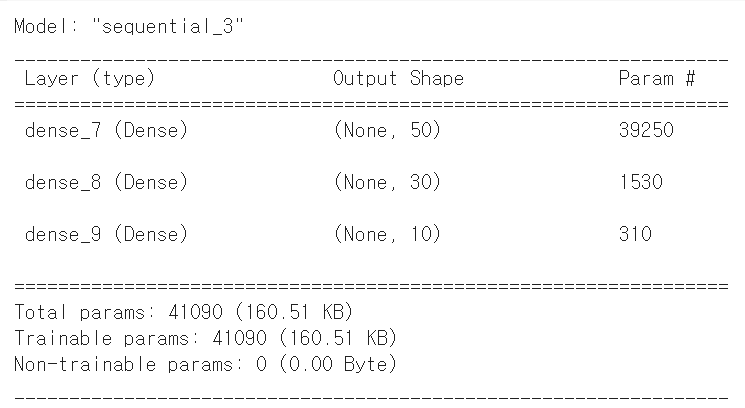

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
     layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(50, input_shape=(784,), activation="relu"))
model.add(Dense(30, input_shape=(1,), activation="relu"))
model.add(Dense(10, input_shape=(1,), activation="relu"))

model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 50)                39250     
                                                                 
 dense_36 (Dense)            (None, 30)                1530      
                                                                 
 dense_37 (Dense)            (None, 10)                310       
                                                                 
Total params: 41090 (160.51 KB)
Trainable params: 41090 (160.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### (Q1-3) [10 points] Compile and fit your model.
 - [5] Set optimizer as 'SGD', Set proper loss and set evaluation metric as 'accuracy'
 - [5] Fit your model using 8 number of epochs with batch size 50. Specify validation data as (test_images, test, labels)

In [ ]:
model.compile(optimizer="SGD",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [ ]:
test_images = test_images[:1000]
partial_test_images = test_images[1000:]
test_labels = test_labels[:1000]
partial_test_labels = test_labels[1000:]

In [ ]:
history = model.fit (partial_test_images,
                     partial_test_labels,
                     epochs=8,
                     batch_size=50,
                     validation_data=(test_images, test_labels))

ValueError: Expected input data to be non-empty.

## Q2 Youtube reply data.

Let's create a spam detection model, a simple binary classification model! :)

It is a public set of comments collected for spam research. It has five datasets composed by 1,956 real messages extracted from five videos that were among the 10 most viewed on the collection period.


Here are some codes to download and prepare data.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
youtube_spam_collection = fetch_ucirepo(id=380)

# data (as pandas dataframes)
X = youtube_spam_collection.data.features.copy()
y = youtube_spam_collection.data.targets.copy()


Cores for some preprocessing.

In [ ]:
# Some preprocessing

import re
X.iloc[:,2] = X.iloc[:,2].apply(lambda x: re.sub(r'http\S+', ' http', x))    ## replace http something -> http
X.iloc[:,2] = X.iloc[:,2].apply(lambda x: re.sub(r'\S+.?\S+.\S[3]', ' http', x))    ## replace xxx.xxx.xxx -> http
X.iloc[:, 2] = X.iloc[:, 2].apply(lambda x: re.sub(r'(\\|%|\[|\]|!|\?|#|&)\S+', ' ---', x)) ## words starting with \, %, [, ], !, & or ? -> '---'
X.iloc[:,2] = X.iloc[:,2].apply(lambda x: x.lower())


Randomly shuffle data using pre-defined idx.

In [ ]:
!gdown 1ne1COVEoKPOPBWQAbrL1NjTGzVJXWUFH

Downloading...
From: https://drive.google.com/uc?id=1ne1COVEoKPOPBWQAbrL1NjTGzVJXWUFH
To: /content/record1.pkl
100% 6.43M/6.43M [00:00<00:00, 31.5MB/s]


In [ ]:
import numpy as np
import pickle

with open('record1.pkl', 'rb') as f:
  record1 = pickle.load(f)
  _, _, _, _, _, _, idx = record1

X_shuffled = X.iloc[idx, 2]
y_shuffled = y.iloc[idx]

Check first 10 sampels

In [ ]:
## Targets

X_shuffled[:10]

1778    stop wasting up your time and  get paid to mes...
1936                                  love this song  ---
1928    hello everyone, it is not my intention to spam...
1102    check out this funny video  --- box knocks out...
1729                         ....i stil lisening this :)﻿
891           this is so  http9;t i heard this before ---
1586                                           nice song﻿
406     i love this song, it´s for empowering every wo...
177                                                  http
887                     check out this video on youtube:﻿
Name: CONTENT, dtype: object

In [ ]:
## Labels, 0: normal, 1:spam

y_shuffled[:10]

,CLASS
1778,1
1936,0
1928,1
1102,1
1729,0
891,0
1586,0
406,0
177,1
887,1


In [ ]:
## Count words so that we use most frequent words to use Bag of Words feature.

word_counts = {}
for row in X_shuffled:
    for word in row.split():
        word_counts[word] = word_counts.get(word, 0) + 1

sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

sorted_words = [word for word, count in sorted_word_counts.items() if count >= 10]


In [ ]:
word_index = dict( [  (str1, i) for i, str1 in enumerate(sorted_words) ] )
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

Split data as train, validation and test sets

In [ ]:
X_train = X_shuffled[:1000]
y_train = y_shuffled[:1000]

X_val = X_shuffled[1000:1500]
y_val = y_shuffled[1000:1500]

X_test = X_shuffled[1500:]
y_test = y_shuffled[1500:]

#### (Q2-1) [10 points] Make a vectorize_sequences function just like chapter 4.
 - `sorted_words` is a list of most frequent words used in the reply. `word_index` and `reverse_word_index` are index to word or word to index mapping information for the words.
 - Input is sequences like X_train, X_val and X_test.
 - Modify the code below.

Codes from chapter 4 is below for your referecne. You have to modify the below function. Be careful, this time input is words not integers. You have to modify accordingly.

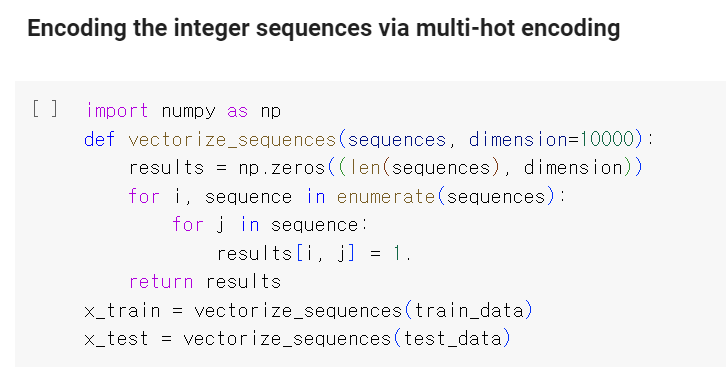

In [ ]:
## Modify function below

def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            try :
              ### Hint!: Modify this part
              results[i, j] = 1.
            except :
              pass
    return results



In [ ]:
## get features using vectorize_sequences funtion that you defined

x4train = vectorize_sequences(X_train, dimension= len(sorted_words))
x4val = vectorize_sequences(X_val, dimension= len(sorted_words))
x4test = vectorize_sequences(X_test, dimension= len(sorted_words))

If you wrote the code correctly, the first output result of the training set will be same as below.

If there is something wrong, it may have all zeros.

In [ ]:
x4train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### (Q2-2) [10 points] Design a simple neural network model using four dense layers.
  - Try to use Functional API of keras, not sequential one.
  - Three hidden dense layers have dimension of 36, 20 and 10 with a relu activation.
  - Define final dense layer with the proper activation for binary classification output.
  - Model should look like below.

  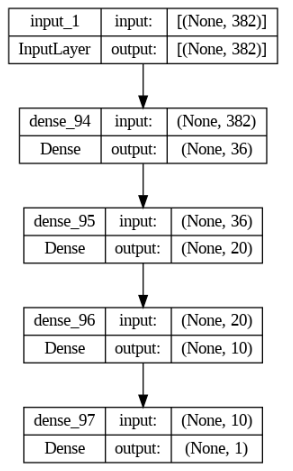


If you cannot solve problem Q2-1, run the code below to receive the preprocessed data and then solve the problem.

In [ ]:
!gdown 1ne1COVEoKPOPBWQAbrL1NjTGzVJXWUFH

Downloading...
From: https://drive.google.com/uc?id=1ne1COVEoKPOPBWQAbrL1NjTGzVJXWUFH
To: /content/record1.pkl
100% 6.03M/6.03M [00:00<00:00, 19.8MB/s]


In [ ]:
## Loading correct x4train, x4val, x4test, y_train, y_val, y_test datasets.

import pickle

with open('record1.pkl', 'rb') as f:
  record1 = pickle.load(f)
  x4train, x4val, x4test, y_train, y_val, y_test, idx = record1


In [ ]:
inputs = keras.Input(shape=(36,), name="my_input")
features = layers.Dense(20, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")

In [ ]:
import numpy as np

num_samples = 100

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

NameError: name 'vocabulary_size' is not defined

#### (Q2-3) [15 points] Compile and fit your model.
 - [5] Set optimizer as 'rmsprop', Set proper loss and set evaluation metric as 'accuracy'
 - [5] Fit your model using 50 number of epochs with batch size 20. Specify validation data as (test_images, test, labels)
 - [5] Evaluate your model using X4test and y4test. Report evaluation accuracy for test dataset.

In [ ]:
model.compile( ## your code here

               )

In [ ]:
history = model.fit(## your code here

                    )

Epoch 1/50
50/50 [==============================] - 2s 10ms/step - loss: 0.6636 - accuracy: 0.6560 - val_loss: 0.6268 - val_accuracy: 0.6960
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5944 - accuracy: 0.7270 - val_loss: 0.5718 - val_accuracy: 0.7400
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5433 - accuracy: 0.7430 - val_loss: 0.5468 - val_accuracy: 0.7360
Epoch 4/50
50/50 [==============================] - 0s 6ms/step - loss: 0.5118 - accuracy: 0.7520 - val_loss: 0.5294 - val_accuracy: 0.7460
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4998 - accuracy: 0.7470 - val_loss: 0.5306 - val_accuracy: 0.7420
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.7500 - val_loss: 0.5218 - val_accuracy: 0.7460
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4819 - accuracy: 0.7550 - val_loss: 0.5204 - val_accuracy: 0.7420
Epoch 8/50
50/50 [=

In [ ]:
## Evaluation code here (using X4test, y_test)

15/15 [==============================] - 1s 11ms/step - loss: 0.4688 - accuracy: 0.8026
[0.4687938690185547, 0.8026315569877625]


You may want to check history. The results won't be exactly the same, but they will be similar.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

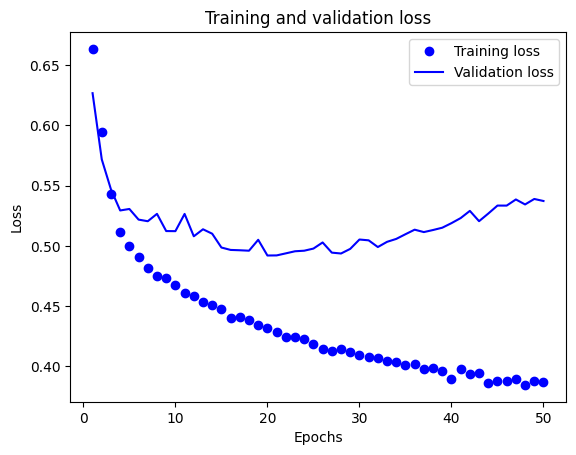

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

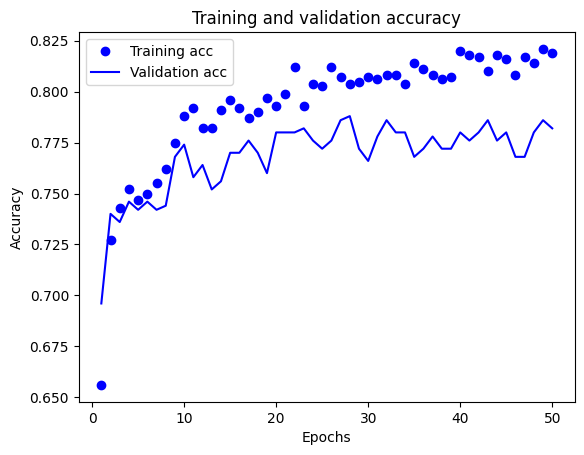

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### (Q2-3) [10 points] Revise your network and retrain using Callbacks.
 - [5] Try to use Dropout(0.5) layers after three hidden dense layers.
 - [5] Use Early Stopping callback with patience parameter 7 monitoring validation loss, and use ModelCheckpoint callbact to save the bese model based on validation loss

In [ ]:
## Your model code here


In [ ]:

callbacks = [
    ## Define your callbacks here
]

model.compile(optimizer="rmsprop",
              loss= ## define your loss here ,
              metrics=["accuracy"])

history = model.fit(
    ## your code here

)


Epoch 1/50
50/50 [==============================] - 3s 13ms/step - loss: 0.6900 - accuracy: 0.5240 - val_loss: 0.6824 - val_accuracy: 0.6840
Epoch 2/50
25/50 [==============>...............] - ETA: 0s - loss: 0.6904 - accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 0s 6ms/step - loss: 0.6883 - accuracy: 0.5330 - val_loss: 0.6745 - val_accuracy: 0.6820
Epoch 3/50
50/50 [==============================] - 0s 7ms/step - loss: 0.6716 - accuracy: 0.5930 - val_loss: 0.6575 - val_accuracy: 0.7260
Epoch 4/50
50/50 [==============================] - 0s 6ms/step - loss: 0.6621 - accuracy: 0.5940 - val_loss: 0.6389 - val_accuracy: 0.7320
Epoch 5/50
50/50 [==============================] - 0s 5ms/step - loss: 0.6469 - accuracy: 0.6190 - val_loss: 0.6192 - val_accuracy: 0.7520
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6353 - accuracy: 0.6340 - val_loss: 0.6014 - val_accuracy: 0.7560
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6152 - accuracy: 0.6620 - val_loss: 0.5819 - val_accuracy: 0.7520
Epoch 8/50
50/50 [==============================] - 0s 5ms/step - loss: 0.6085 - accuracy: 0.6660 - val_loss: 0.5707 - val_accuracy: 0.7540
Epoch 9/50
50/50 [=============

You may want to check history. The results won't be exactly the same, but they will be similar.

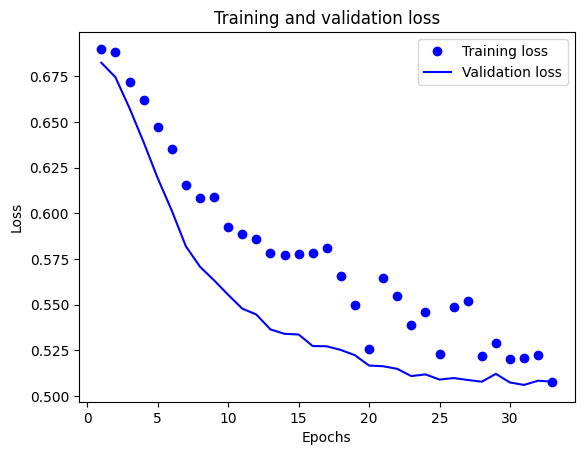

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

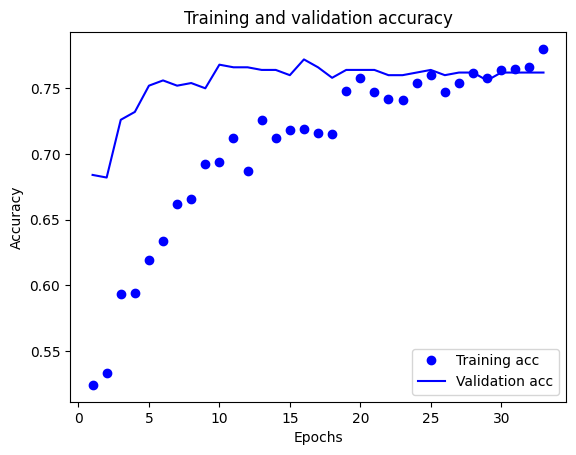

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### (Q2-4) [5 points] Load the saved best model and evaluate the model on test data.

In [ ]:
## Your code here


15/15 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7961
[0.4830082952976227, 0.7960526347160339]


#### (Q2-4) [10 points] Consider additional input feature, wold length feature. Make a multi-input model.
  - we can calculate wordlength feature using the code below
  - Using the multi-hot encoded reply_input feature(X4train, X4val, X4test) and chrlength feature (chrlength_train, chrlength_val, chrlength_test), try to make a multi-input model like below.

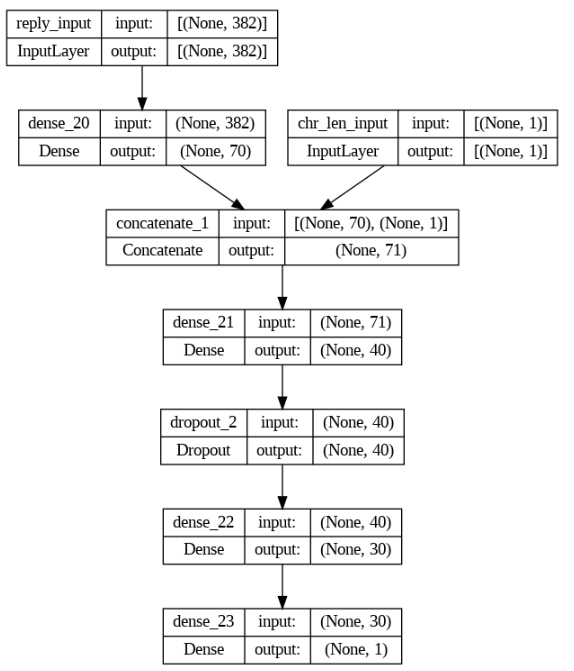

New chrlength feature is defined below. It is just a length of string normalized by maximum chrlength value.

In [ ]:
X_ori = youtube_spam_collection.data.features.iloc[idx,2]
chrlength_text = np.array([ len(X_ori[i]) for i in range(len(X_ori)) ])
max_len = chrlength_text.max()

chrlength_train = chrlength_text[:1000]/max_len
chrlength_val = chrlength_text[1000:1500]/max_len
chrlength_test = chrlength_text[1500:]/max_len


NameError: name 'youtube_spam_collection' is not defined

In [ ]:

## Define your multi-input model here



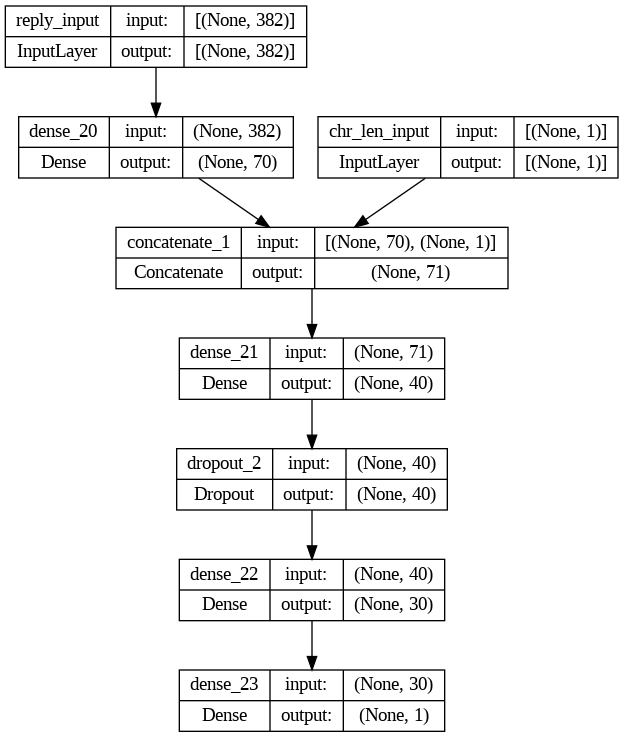

In [ ]:
## If you define right, the result should look like below.
keras.utils.plot_model(model, "spam_classifier_with_shape_info.png", show_shapes=True)

#### (Q2-5) [5 points] Train and evaluate multi-input model
  - For compile, use RMSprop, specify metrics as accuracy. Use ModelCheckpoint callback saving a best model based on validation loss.
  - For training, train 100 number of epochs, using batch size 20. Use x4val, wordlength_val, and y_val for your validation data.
  - Finally, evaluate your model on test dataset.

In [ ]:

callbacks = [
#   Define your callbacks here
]

model.compile(## define compile part here

              )
history = model.fit(
    ## Your code here
)


Epoch 1/100
50/50 [==============================] - 2s 8ms/step - loss: 0.8474 - accuracy: 0.5070 - val_loss: 0.6844 - val_accuracy: 0.5500
Epoch 2/100
35/50 [====================>.........] - ETA: 0s - loss: 0.7851 - accuracy: 0.5357

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 0s 4ms/step - loss: 0.7557 - accuracy: 0.5610 - val_loss: 0.7235 - val_accuracy: 0.6060
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6960 - accuracy: 0.6160 - val_loss: 0.6122 - val_accuracy: 0.7360
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6490 - accuracy: 0.6800 - val_loss: 0.5875 - val_accuracy: 0.7260
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6113 - accuracy: 0.6760 - val_loss: 0.5602 - val_accuracy: 0.7460
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5890 - accuracy: 0.7170 - val_loss: 0.5518 - val_accuracy: 0.7380
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5673 - accuracy: 0.7250 - val_loss: 0.5390 - val_accuracy: 0.7340
Epoch 8/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5248 - accuracy: 0.7350 - val_loss: 0.5446 - val_accuracy: 0.7380
Epoch 9/100
50/50 [======

In [ ]:
## Load the best model, and evaluate on test datasets.

## Your code here

15/15 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7851
[0.4799533784389496, 0.7850877046585083]
